  #                             MARKET BASKET ANALYSIS

Market basket analysis is a technique used by companies to identify products that their customers frequently purchase together. It is widely used in retail and e-commerce to understand purchasing behavior and run targeted marketing campaigns. This technique is used to uncover hidden relationships that cannot be identified just by the human eye.

In [33]:
#import statements to load data
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [34]:
df = pd.read_csv('Market Basket Analysis - Groceries_dataset.csv')

## Exploratory Data Analysis

In [35]:
df.head()

,Member_number,Date,itemDescription
0,1808,21-07-2015,tropical fruit
1,2552,05-01-2015,whole milk
2,2300,19-09-2015,pip fruit
3,1187,12-12-2015,other vegetables
4,3037,01-02-2015,whole milk


In [36]:
#checking for null values 
df.isnull().values.any()

False

In [37]:
#checking for columns and rows 
df.shape

(38765, 3)

In [38]:
#statistical analysis 
df.describe()

,Member_number
count,38765.000000
mean,3003.641868
std,1153.611031
min,1000.000000
25%,2002.000000
50%,3005.000000
75%,4007.000000
max,5000.000000


In [39]:
#unique count of goods sold in the store
df['itemDescription'].nunique()

167

In [40]:
#number of each item sold
df.itemDescription.value_counts()

whole milk               2502
other vegetables         1898
rolls/buns               1716
soda                     1514
yogurt                   1334
                         ... 
rubbing alcohol             5
bags                        4
baby cosmetics              3
kitchen utensil             1
preservation products       1
Name: itemDescription, Length: 167, dtype: int64

## Visualization 

This visual shows 20 most popular items in the store and the frequency in which they are sold.

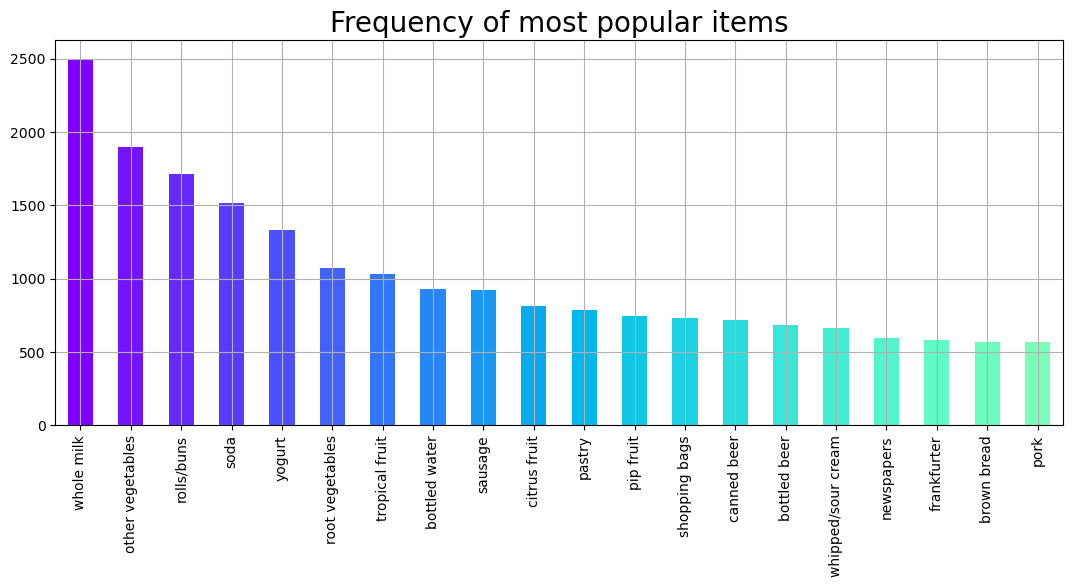

In [41]:
#visualization of most popular items 
color = plt.cm.rainbow(np.linspace(0,1,40))
df['itemDescription'].value_counts().head(20).plot.bar(color = color, figsize=(13,5))
plt.title('Frequency of most popular items', fontsize = 20)
plt.xticks(rotation = 90)
plt.grid()
plt.show()

## Preparing the  Data For Market Basket Analysis 
To perform the analysis using the Apriori algorithm, we need to prepare the data well so that it can easily be injested into it.
Firstly, group the items in the dataset to form one transaction. 
secondly, pivot the table to convert items into columns and transactions into rows.
Lastly, is to hot encode our data to create create a simple function converting any values above zero to one and all zeros to zero.


In [42]:
#grouping items that have the same member number and date
df['one_transaction'] = df['Member_number'].astype(str)+'_' + df['Date'].astype(str)
df.head()

,Member_number,Date,itemDescription,one_transaction
0,1808,21-07-2015,tropical fruit,1808_21-07-2015
1,2552,05-01-2015,whole milk,2552_05-01-2015
2,2300,19-09-2015,pip fruit,2300_19-09-2015
3,1187,12-12-2015,other vegetables,1187_12-12-2015
4,3037,01-02-2015,whole milk,3037_01-02-2015


In [43]:
#converting items to columns and transactions to rows
df1 = pd.crosstab(df['one_transaction'], df['itemDescription'])
df1.head()

itemDescription,Instant food products,UHT-milk,abrasive cleaner,artif. sweetener,baby cosmetics,bags,baking powder,bathroom cleaner,beef,berries,...,turkey,vinegar,waffles,whipped/sour cream,whisky,white bread,white wine,whole milk,yogurt,zwieback
one_transaction,,,,,,,,,,,,,,,,,,,,,
1000_15-03-2015,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,1,0
1000_24-06-2014,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
1000_24-07-2015,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1000_25-11-2015,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1000_27-05-2015,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [44]:
#encoding all values in the dataframe to 0 and 1

def encode(item_freq):
    res = 0
    if item_freq > 0:
        res = 1
    return res

basket_input = df1.applymap(encode)

## Identifying Frequent Items Combination With Apriori Algorithm 
The Apriori algorithm aims to discover frequent itemsets in all dataset and extract association rules between items based on their occurences in transactions.

In [45]:
#import apriori algorithm 

from mlxtend.frequent_patterns import apriori
from mlxtend.frequent_patterns import association_rules

In [46]:
#association rule
frequent_itemsets = apriori(basket_input, min_support=0.001, use_colnames=True)
rules = association_rules(frequent_itemsets, metric="lift")
rules.head()

C:\Users\User\anaconda3\Lib\site-packages\mlxtend\frequent_patterns\fpcommon.py:110: DeprecationWarning: DataFrames with non-bool types result in worse computationalperformance and their support might be discontinued in the future.Please use a DataFrame with bool type
  warnings.warn(


,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction,zhangs_metric
0,(bottled water),(UHT-milk),0.060683,0.021386,0.001069,0.017621,0.823954,-0.000228,0.996168,-0.185312
1,(UHT-milk),(bottled water),0.021386,0.060683,0.001069,0.050000,0.823954,-0.000228,0.988755,-0.179204
2,(other vegetables),(UHT-milk),0.122101,0.021386,0.002139,0.017515,0.818993,-0.000473,0.996060,-0.201119
3,(UHT-milk),(other vegetables),0.021386,0.122101,0.002139,0.100000,0.818993,-0.000473,0.975443,-0.184234
4,(sausage),(UHT-milk),0.060349,0.021386,0.001136,0.018826,0.880298,-0.000154,0.997391,-0.126418


In [47]:
#getting the most frequent item combinations in the dataset, sorting by support,confidence and lift

df2 = rules.sort_values(["support", "confidence", "lift"],axis = 0, ascending = False).head(10)

In [70]:
#10 most frequent item combinations 
df2

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction,zhangs_metric
623,(rolls/buns),(whole milk),0.110005,0.157923,0.013968,0.126974,0.804028,-0.003404,0.964550,-0.214986
622,(whole milk),(rolls/buns),0.157923,0.110005,0.013968,0.088447,0.804028,-0.003404,0.976350,-0.224474
694,(yogurt),(whole milk),0.085879,0.157923,0.011161,0.129961,0.822940,-0.002401,0.967861,-0.190525
695,(whole milk),(yogurt),0.157923,0.085879,0.011161,0.070673,0.822940,-0.002401,0.983638,-0.203508
551,(soda),(other vegetables),0.097106,0.122101,0.009691,0.099794,0.817302,-0.002166,0.975219,-0.198448
550,(other vegetables),(soda),0.122101,0.097106,0.009691,0.079365,0.817302,-0.002166,0.980729,-0.202951
649,(sausage),(whole milk),0.060349,0.157923,0.008955,0.148394,0.939663,-0.000575,0.988811,-0.063965
648,(whole milk),(sausage),0.157923,0.060349,0.008955,0.056708,0.939663,-0.000575,0.996140,-0.070851
624,(yogurt),(rolls/buns),0.085879,0.110005,0.007819,0.091051,0.827697,-0.001628,0.979147,-0.185487
625,(rolls/buns),(yogurt),0.110005,0.085879,0.007819,0.071081,0.827697,-0.001628,0.984071,-0.189562


This table shows 10 most popular product combinations that are frequently bought together.


#### RECOMMENDATIONS:
The store should put this items close to each other on the shelves so it will be easier for customers to see and purchase them at ease also they can run ads and promotions/discounts with the items put together to boost sales.